In [1]:
# EDA Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


In [2]:
# EDA Step 2: Load the dataset
# Replace 'path_to_ddos_dataset.csv' with your actual file path
data = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

# Check the dimensions of the dataset
print("Data Shape:", data.shape)
data.head()
data.columns = [col.strip() for col in data.columns]


Data Shape: (225745, 85)


In [3]:
data.columns = data.columns.str.strip()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225745 non-null  object 
 1   Source IP                    225745 non-null  object 
 2   Source Port                  225745 non-null  int64  
 3   Destination IP               225745 non-null  object 
 4   Destination Port             225745 non-null  int64  
 5   Protocol                     225745 non-null  int64  
 6   Timestamp                    225745 non-null  object 
 7   Flow Duration                225745 non-null  int64  
 8   Total Fwd Packets            225745 non-null  int64  
 9   Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets  225745 non-null  int64  
 11  Total Length of Bwd Packets  225745 non-null  int64  
 12  Fwd Packet Length Max        225745 non-null  int64  
 13 

## Handling missing values

In [4]:
# EDA Step 4: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
Flow Bytes/s    4
dtype: int64


In [5]:
# Since 'Flow Bytes/s' has 4 missing entries, we decide how to handle them.
# 1 option: Drop rows with missing 'Flow Bytes/s'
# data.dropna(subset=['Flow Bytes/s'], inplace=True)

# 2 option: Impute with median value
median_flow_bytes = data['Flow Bytes/s'].median()
data['Flow Bytes/s'].fillna(median_flow_bytes, inplace=True)

print("\nAfter handling missing values:")
missing_vals_post = data.isnull().sum().sort_values(ascending=False)
print(missing_vals_post[missing_vals_post > 0])

# 4. Confirm shape if dropping rows or confirm data if imputing
print("\nData shape after missing-value handling:", data.shape)
# data.head()



After handling missing values:
Series([], dtype: int64)

Data shape after missing-value handling: (225745, 85)


In [6]:
# EDA Step 5: Descriptive statistics for numeric columns
data.describe()

/Users/apurva/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/apurva/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.000000,225745.00000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000,225745.0,225745.0,225745.0,225745.000000,225745.000000,2.257450e+05,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.000000,225745.0,225745.0,225745.0,225745.0,225745.0,225745.0,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,38257.568402,8879.61946,7.600288,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,2735.585147,16.718776,890.536849,1230.172938,inf,inf,1.580587e+06,4.248569e+06,1.348977e+07,2.811855e+04,1.539652e+07,2.540610e+06,5.195207e+06,1.299434e+07,2.073698e+05,6.564701e+06,9.476322e+05,1.610306e+06,4.567514e+06,2.257817e+05,0.033223,0.0,0.0,0.0,111.522718,106.789023,1.261508e+04,1.641693e+03,8.072595,3226.045339,515.002137,1085.593207,2.789906e+06,0.002671,0.033223,0.000120,0.351162,0.504463,0.140752,0.0,0.000120,1.005821,574.568843,164.826715,890.536849,111.522718,0.0,0.0,0.0,0.0,0.0,0.0,4.874916,939.463346,4.572775,5.960477e+03,4247.436922,601.048635,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,23057.302075,19754.64740,3.881586,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,3705.123460,50.480568,1120.324921,1733.201267,NaN,NaN,2.701596e+06,7.622819e+06,2.670172e+07,7.598100e+05,3.160826e+07,5.934694e+06,1.078635e+07,2.748870e+07,3.795228e+06,2.198455e+07,4.586374e+06,5.475778e+06,1.617865e+07,4.019290e+06,0.179220,0.0,0.0,0.0,375.790727,511.765795,1.106701e+05,1.989593e+04,15.767713,3813.134850,559.064495,1269.558714,4.115941e+06,0.051614,0.179220,0.010936,0.477334,0.499981,0.347766,0.0,0.010936,1.430781,626.096202,504.892965,1120.324921,375.790727,0.0,0.0,0.0,0.0,0.0,0.0,15.422874,3249.403484,21.755356,3.921834e+04,8037.781019,4319.720339,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+0

## Handling duplicate values

In [7]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.shape

(225743, 85)

- 2 duplicate values dropped

## Handling inf values

In [8]:
# data.replace([np.inf, -np.inf], np.nan,inplace=True)

In [9]:
import numpy as np

# Identify rows containing +inf or -inf
inf_mask = data.replace([np.inf, -np.inf], np.nan).isnull().any(axis=1)
num_infinite_rows = inf_mask.sum()

print(f"Number of rows containing ±∞: {num_infinite_rows}")

# Example: Show which columns have ∞ values
inf_cols = data.columns[data.isin([np.inf, -np.inf]).any()]
print("Columns with ±∞ values:", inf_cols.tolist())
 


Number of rows containing ±∞: 34
Columns with ±∞ values: ['Flow Bytes/s', 'Flow Packets/s']


- 0.015% of values are inf
- we can replce them with NaN or 99th percentile values

In [10]:
# Observing Label for inf values
# 1. Build a mask identifying rows where any column is ±∞
inf_mask = data.isin([np.inf, -np.inf]).any(axis=1)

# 2. Filter those rows and examine the Label column
infinite_rows_with_labels = data.loc[inf_mask, 'Label']

# 3. Display the label distribution for rows with infinite values
print("Labels of rows containing ±∞:")
print(infinite_rows_with_labels.value_counts())



Labels of rows containing ±∞:
Label
BENIGN    32
DDoS       2
Name: count, dtype: int64


In [11]:
# Imputing inf values with 99th percentile value of that column 

infinite_cols = data.columns[data.isin([np.inf, -np.inf]).any()]

for col in infinite_cols:
    # 1) Filter out infinite values to get only finite data
    finite_data = data.loc[~data[col].isin([np.inf, -np.inf]), col]

    # option A: 99th percentile
    percentile_99_val = finite_data.quantile(0.99)
    # option B: max value
    # max_val = finite_data.max()

    replacement_value = percentile_99_val  # or max_val

    # 4) Replace +∞ with your chosen replacement
    data[col].replace(np.inf, replacement_value, inplace=True)

print("Number of remaining ±∞ values:", data.isin([np.inf, -np.inf]).sum().sum())


Number of remaining ±∞ values: 0


In [12]:
data.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225743.000000,225743.000000,225743.000000,2.257430e+05,225743.000000,225743.000000,225743.000000,2.257430e+05,225743.000000,225743.000000,225743.000000,225743.000000,225743.000000,225743.000000,225743.000000,225743.000000,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,225743.000000,225743.0,225743.0,225743.0,225743.000000,225743.000000,2.257430e+05,2.257430e+05,225743.000000,225743.000000,225743.000000,225743.000000,2.257430e+05,225743.000000,225743.000000,225743.000000,225743.000000,225743.000000,225743.000000,225743.0,225743.000000,225743.000000,225743.000000,225743.000000,225743.000000,225743.000000,225743.0,225743.0,225743.0,225743.0,225743.0,225743.0,225743.000000,225743.000000,225743.000000,2.257430e+05,225743.000000,225743.000000,225743.000000,225743.000000,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05,2.257430e+05
mean,38257.432270,8879.575717,7.600302,1.624179e+07,4.874942,4.572815,939.471669,5.960530e+03,538.540464,27.882468,164.828175,214.909146,2735.609383,16.718924,890.544739,1230.183837,5.858425e+05,1.431183e+04,1.580601e+06,4.248607e+06,1.348989e+07,2.811880e+04,1.539666e+07,2.540632e+06,5.195253e+06,1.299445e+07,2.073717e+05,6.564759e+06,9.476406e+05,1.610321e+06,4.567555e+06,2.257837e+05,0.033224,0.0,0.0,0.0,111.523139,106.789969,1.259748e+04,1.641707e+03,8.072667,3226.073920,515.006700,1085.602825,2.789930e+06,0.002671,0.033224,0.000120,0.351165,0.504459,0.140744,0.0,0.000120,1.005830,574.573934,164.828175,890.544739,111.523139,0.0,0.0,0.0,0.0,0.0,0.0,4.874942,939.471669,4.572815,5.960530e+03,4246.893937,601.053968,3.311527,21.482659,1.848277e+05,1.293447e+04,2.080867e+05,1.776217e+05,1.032223e+07,3.611975e+06,1.287824e+07,7.755424e+06
std,23057.358855,19754.718263,3.881601,3.152448e+07,15.422939,21.755448,3249.416675,3.921851e+04,1864.136559,163.324861,504.894963,797.414349,3705.130926,50.480767,1120.326748,1733.205077,1.688437e+07,1.151688e+05,2.701604e+06,7.622842e+06,2.670180e+07,7.598134e+05,3.160836e+07,5.934715e+06,1.078639e+07,2.748879e+07,3.795244e+06,2.198464e+07,4.586393e+06,5.475800e+06,1.617872e+07,4.019308e+06,0.179220,0.0,0.0,0.0,375.792365,511.767963,1.105124e+05,1.989602e+04,15.767765,3813.139651,559.064870,1269.560226,4.115951e+06,0.051614,0.179220,0.010936,0.477335,0.499981,0.347758,0.0,0.010936,1.430784,626.096640,504.894963,1120.326748,375.792365,0.0,0.0,0.0,0.0,0.0,0.0,15.422939,3249.416675,21.755448,3.921851e+04,8035.746226,4319.739103,12.270068,4.166700,7.979284e+05,2.102746e+0

## Label column distribution

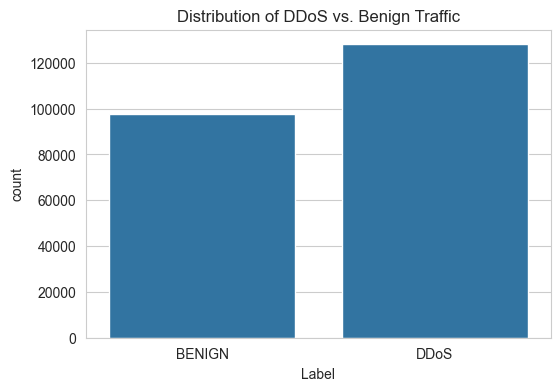

Label Counts:
Label
DDoS      128027
BENIGN     97716
Name: count, dtype: int64


In [13]:
# EDA Step 6: Check distribution of the label or target column
# (Fixing whitespace in column names so "Label" is recognized)

# 1. Strip whitespace from column names
data.columns = [col.strip() for col in data.columns]

# 3. Plot the distribution of your label (e.g., 'BENIGN' vs. 'DDoS')
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=data)
plt.title("Distribution of DDoS vs. Benign Traffic")
plt.show()

# 4. Also display value counts for a quick overview
print("Label Counts:")
print(data['Label'].value_counts())


In [14]:
data.shape

(225743, 85)

- We have kept the original data size and handles missing and  inf values succesfully. We also managed do to some name changes to remove spaces in the column names

# Data Visualization

In [97]:
# data.info()

<Figure size 1500x1200 with 0 Axes>

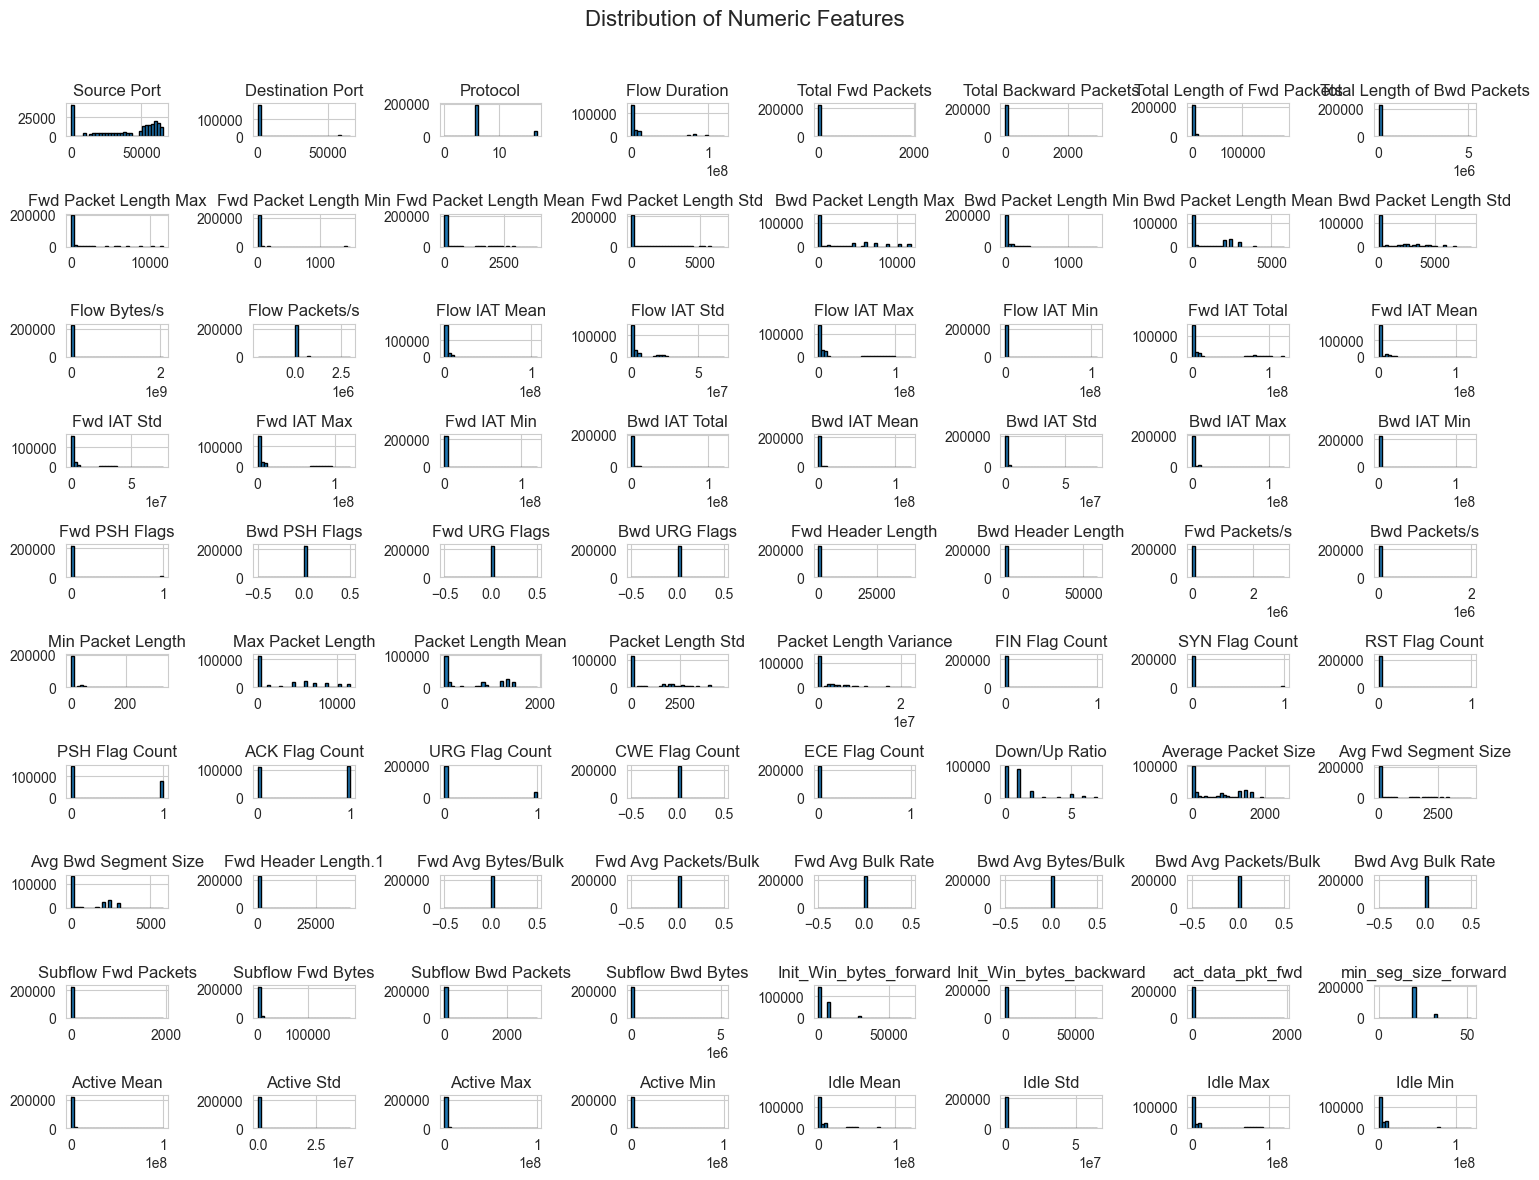

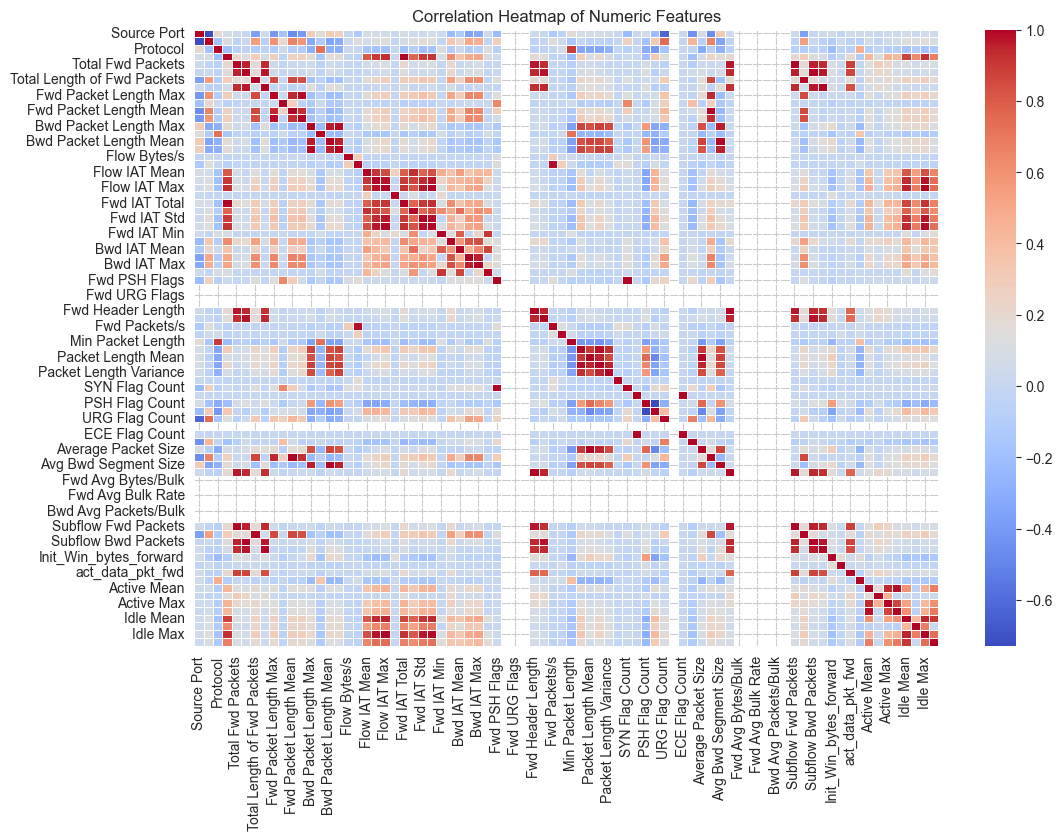

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns for visualization
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Set up the figure size for multiple plots
plt.figure(figsize=(15, 12))

# Generate histograms for a subset of numerical features
numeric_data.hist(bins=30, figsize=(15, 12), layout=(10, 8), edgecolor='black')

plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

# Generate a correlation heatmap to visualize feature relationships
plt.figure(figsize=(12, 8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



In [20]:

# # Compute correlation matrix
# correlation_matrix = numeric_data.corr()

# print(correlation_matrix)

## Scatter plot and box plot to understand data patterns

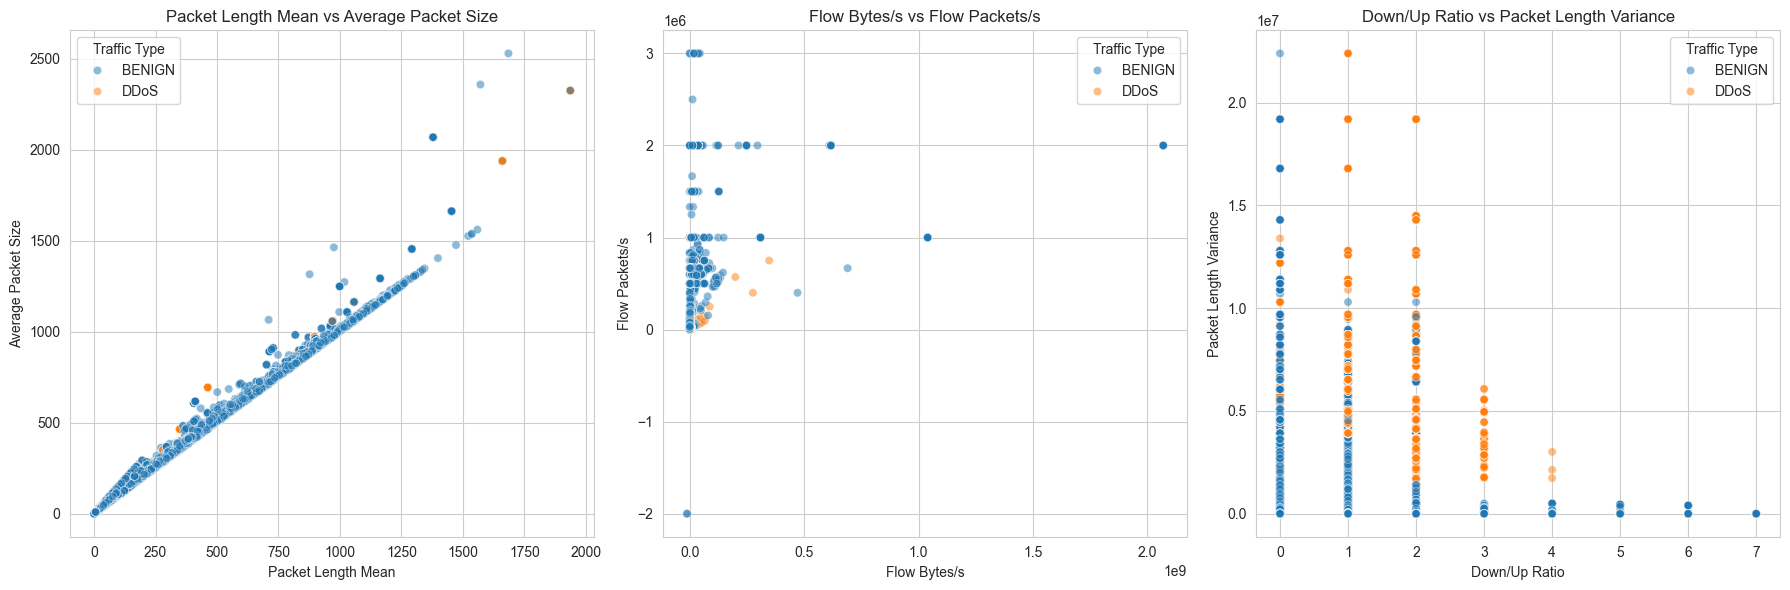

In [21]:

# Select variables for scatter plots
scatter_features = [
    ("Packet Length Mean", "Average Packet Size"),
    ("Flow Bytes/s", "Flow Packets/s"),
    ("Down/Up Ratio", "Packet Length Variance")
]

# Ensure the 'Label' column exists for coloring
if "Label" in data.columns:
    # Set up the figure for multiple scatter plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Create scatter plots with different variable pairs
    for i, (x_feature, y_feature) in enumerate(scatter_features):
        sns.scatterplot(
            x=data[x_feature], y=data[y_feature],
            hue=data["Label"], alpha=0.5, ax=axes[i]
        )
        axes[i].set_title(f"{x_feature} vs {y_feature}")
        axes[i].legend(title="Traffic Type")

    plt.tight_layout()
    plt.show()
else:
    print("The 'Label' column is missing. Ensure the dataset has a classification column (e.g., 'DDoS', 'BENIGN').")


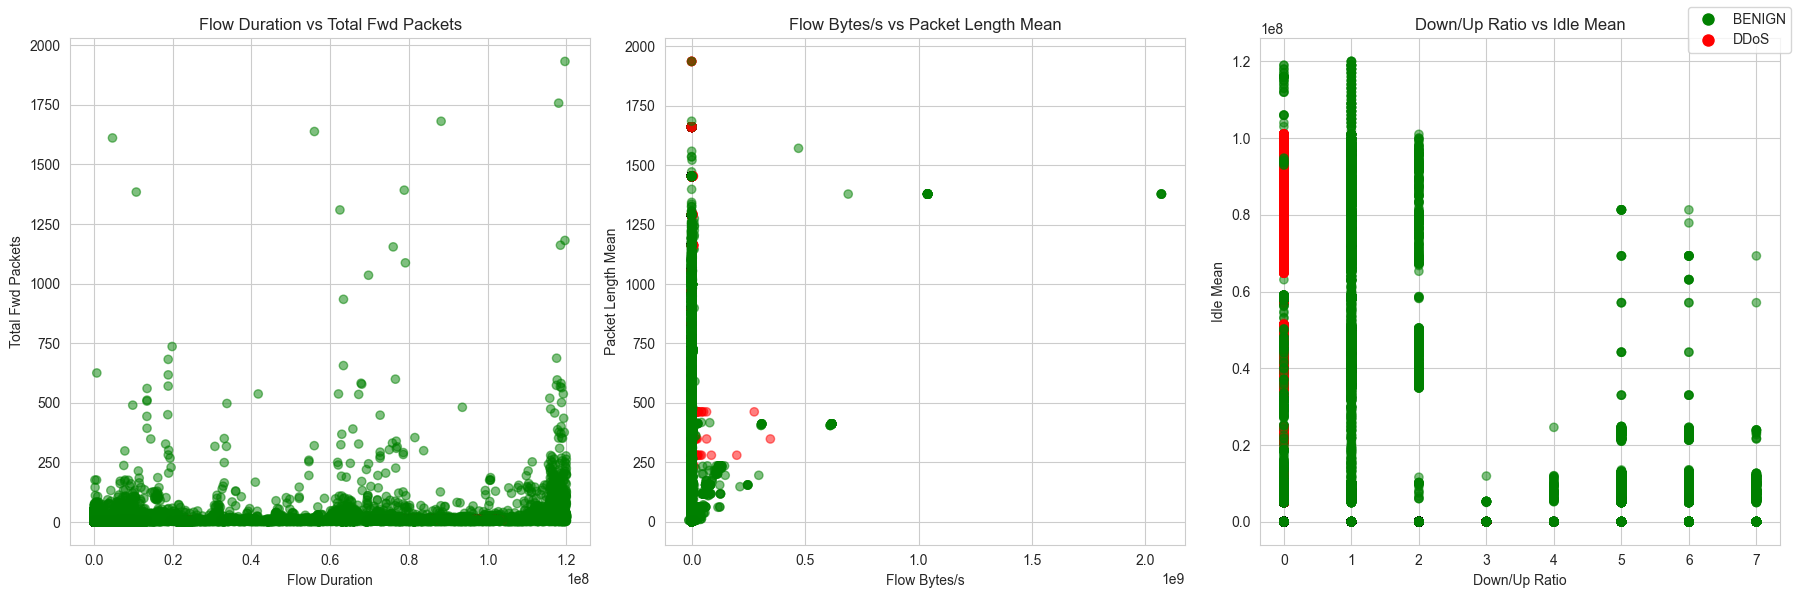

In [26]:

# Define pairs of features for scatter plots
scatter_pairs = [
    ("Flow Duration", "Total Fwd Packets"),
    ("Flow Bytes/s", "Packet Length Mean"),
    ("Down/Up Ratio", "Idle Mean")
]

# Ensure 'Label' column exists for color distinction
if "Label" in data.columns:
    # Convert labels to binary colors (e.g., DDoS -> Red, Benign -> Green)
    label_colors = data["Label"].map({"BENIGN": "green", "DDoS": "red"})

    # Set up the figure for multiple scatter plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Create scatter plots with different variable pairs
    for i, (x_feature, y_feature) in enumerate(scatter_pairs):
        axes[i].scatter(data[x_feature], data[y_feature], c=label_colors, alpha=0.5)
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)
        axes[i].set_title(f"{x_feature} vs {y_feature}")

    # Add a legend manually
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='green', label='BENIGN'),
               plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='red', label='DDoS')]
    fig.legend(handles=handles, loc='upper right')

    plt.tight_layout()
    plt.show()
else:
    print("The 'Label' column is missing. Ensure the dataset has a classification column (e.g., 'DDoS', 'BENIGN').")


## Box plot to understand feature distribution

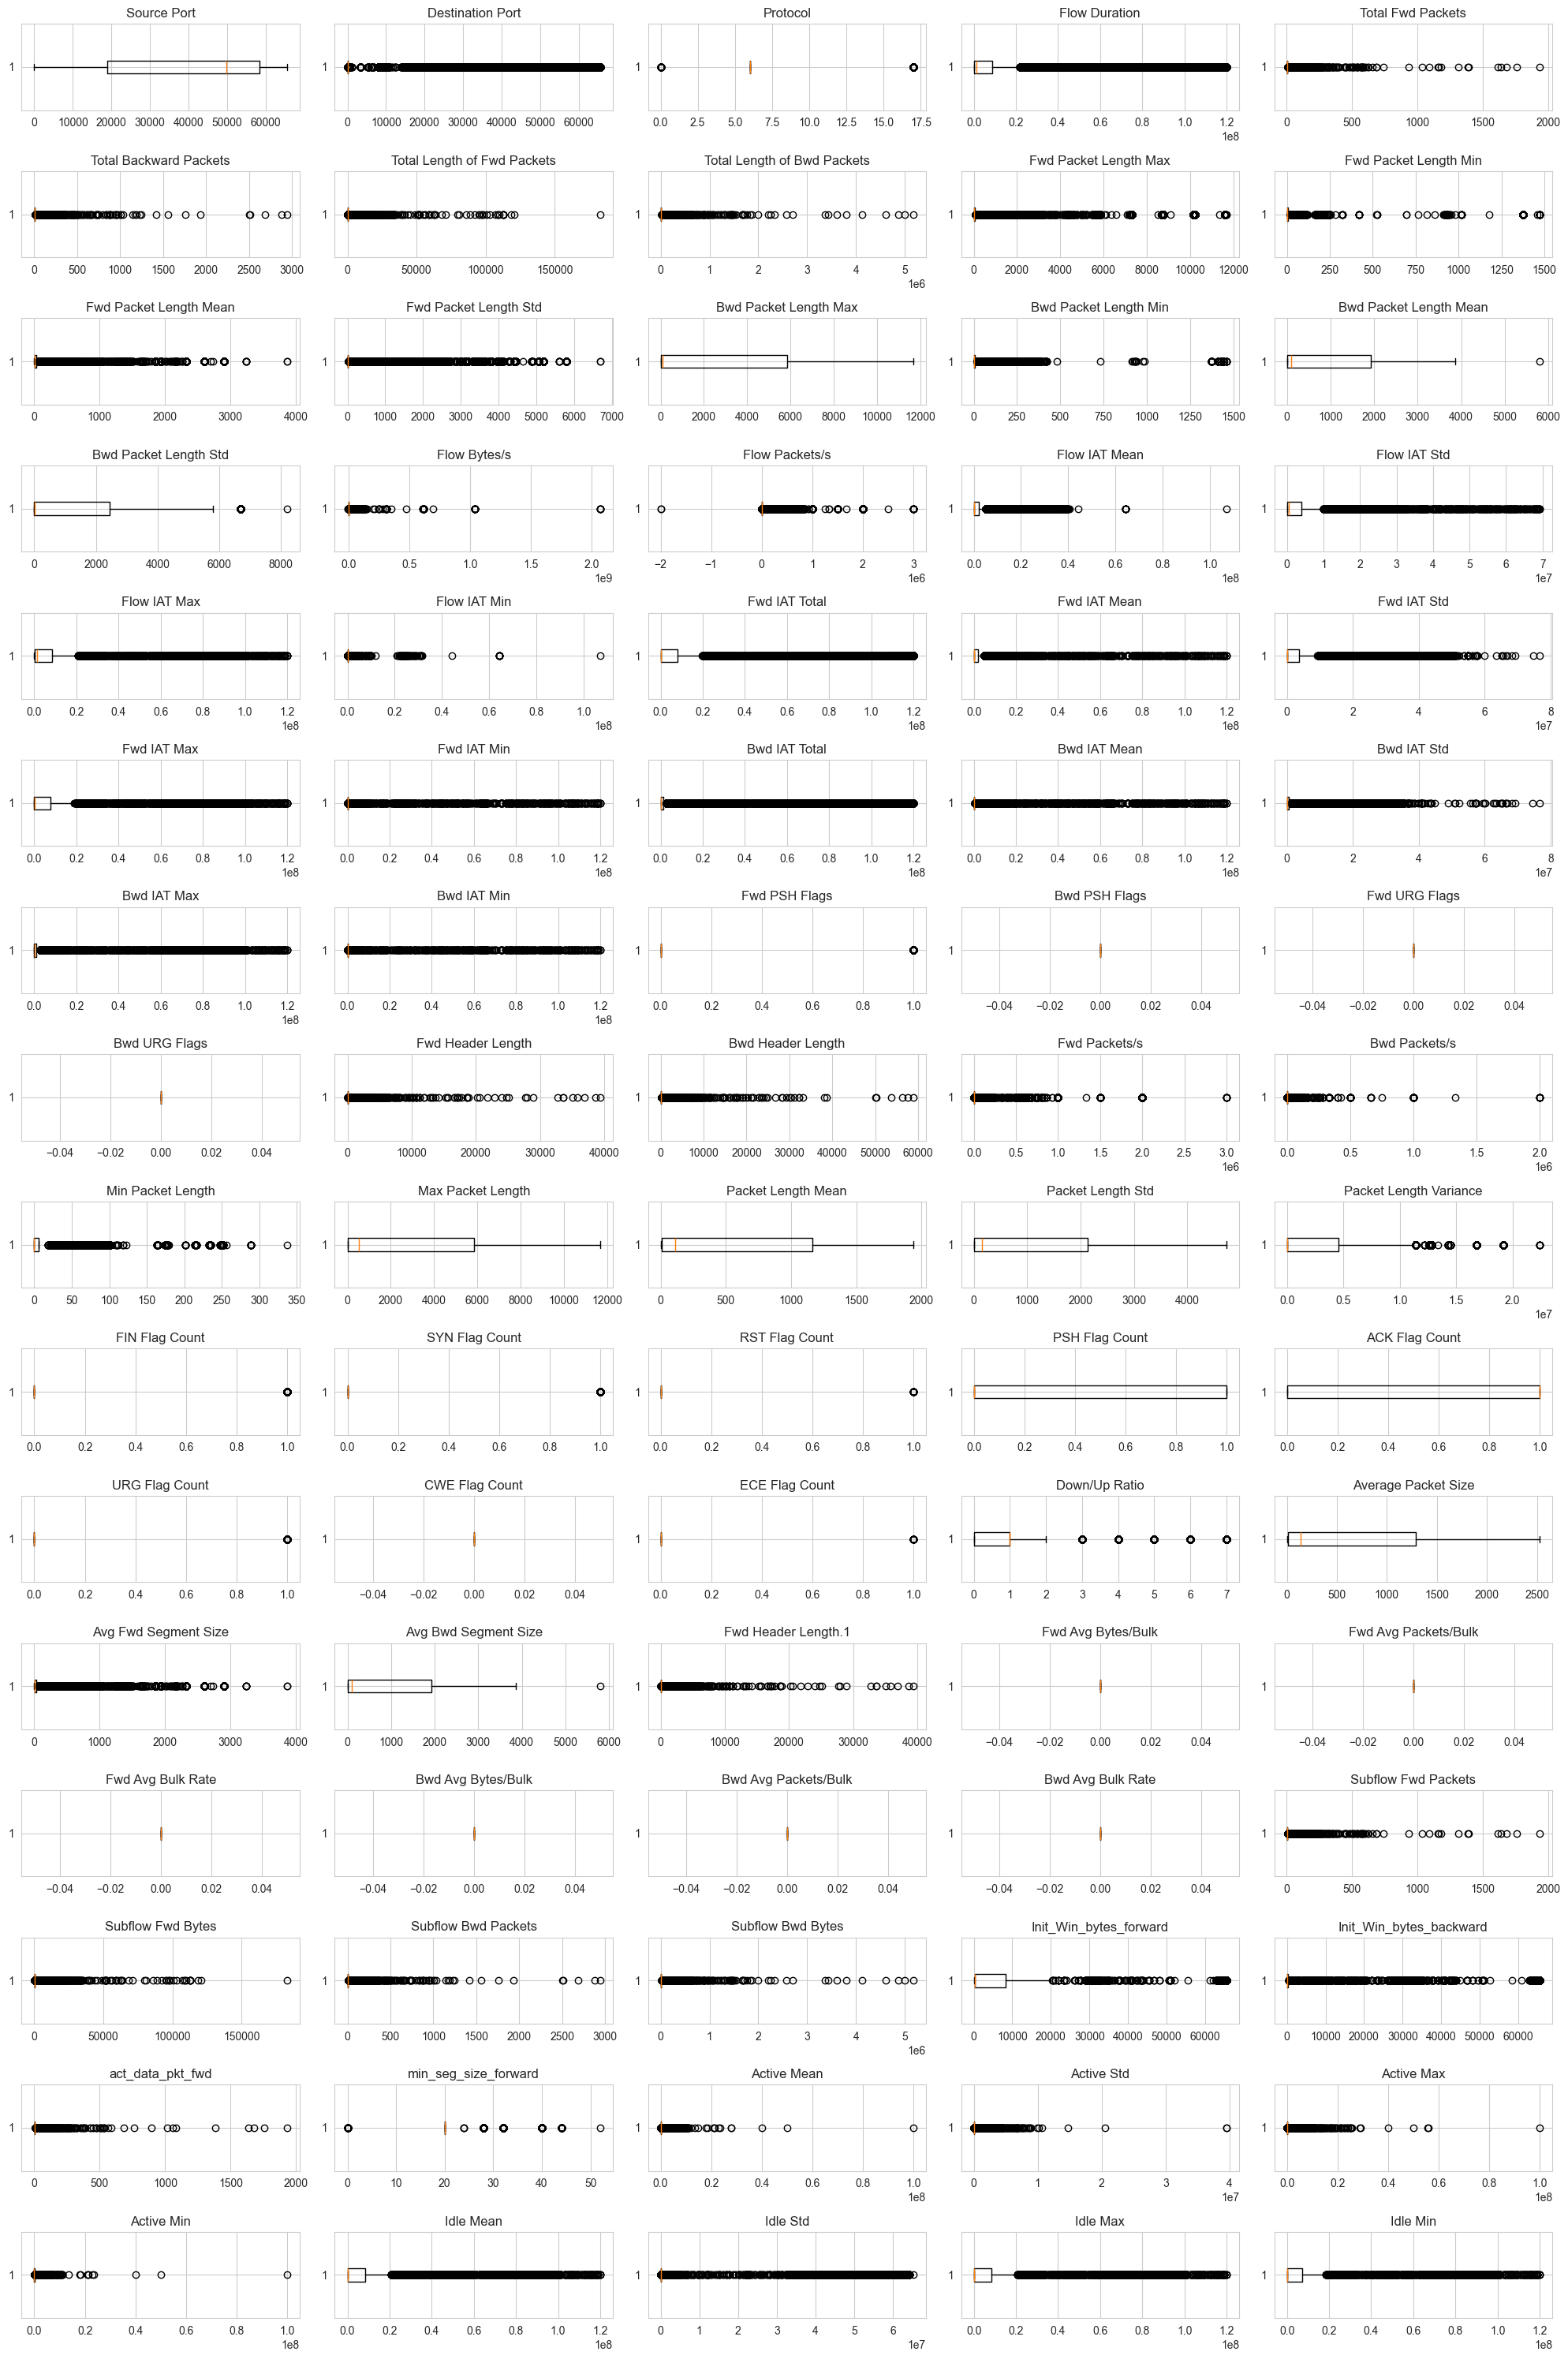

In [32]:
import matplotlib.pyplot as plt

# Select numerical features for visualization
num_features = numeric_data.columns

# Set up the figure size for multiple subplots
fig, axes = plt.subplots(nrows=16, ncols=5, figsize=(20, 30))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot boxplots for each numerical feature
for i, feature in enumerate(num_features):
    axes[i].boxplot(numeric_data[feature].dropna(), vert=False)
    axes[i].set_title(feature)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Numeric Columns

In [59]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
# for col in numeric_cols:
#     col_data = data[col]
#     inf_count = np.isinf(col_data).sum()
#     nan_count = col_data.isna().sum()
#     if inf_count > 0 or nan_count > 0:
#         print(f"Column '{col}' has {inf_count} infinities and {nan_count} NaNs.")


In [58]:
# # Simple clipping at the 1st and 99th percentiles:
# for col in numeric_cols:
#     lower_bound = data[col].quantile(0.01)
#     upper_bound = data[col].quantile(0.99)
#     data[col] = np.clip(data[col], lower_bound, upper_bound)


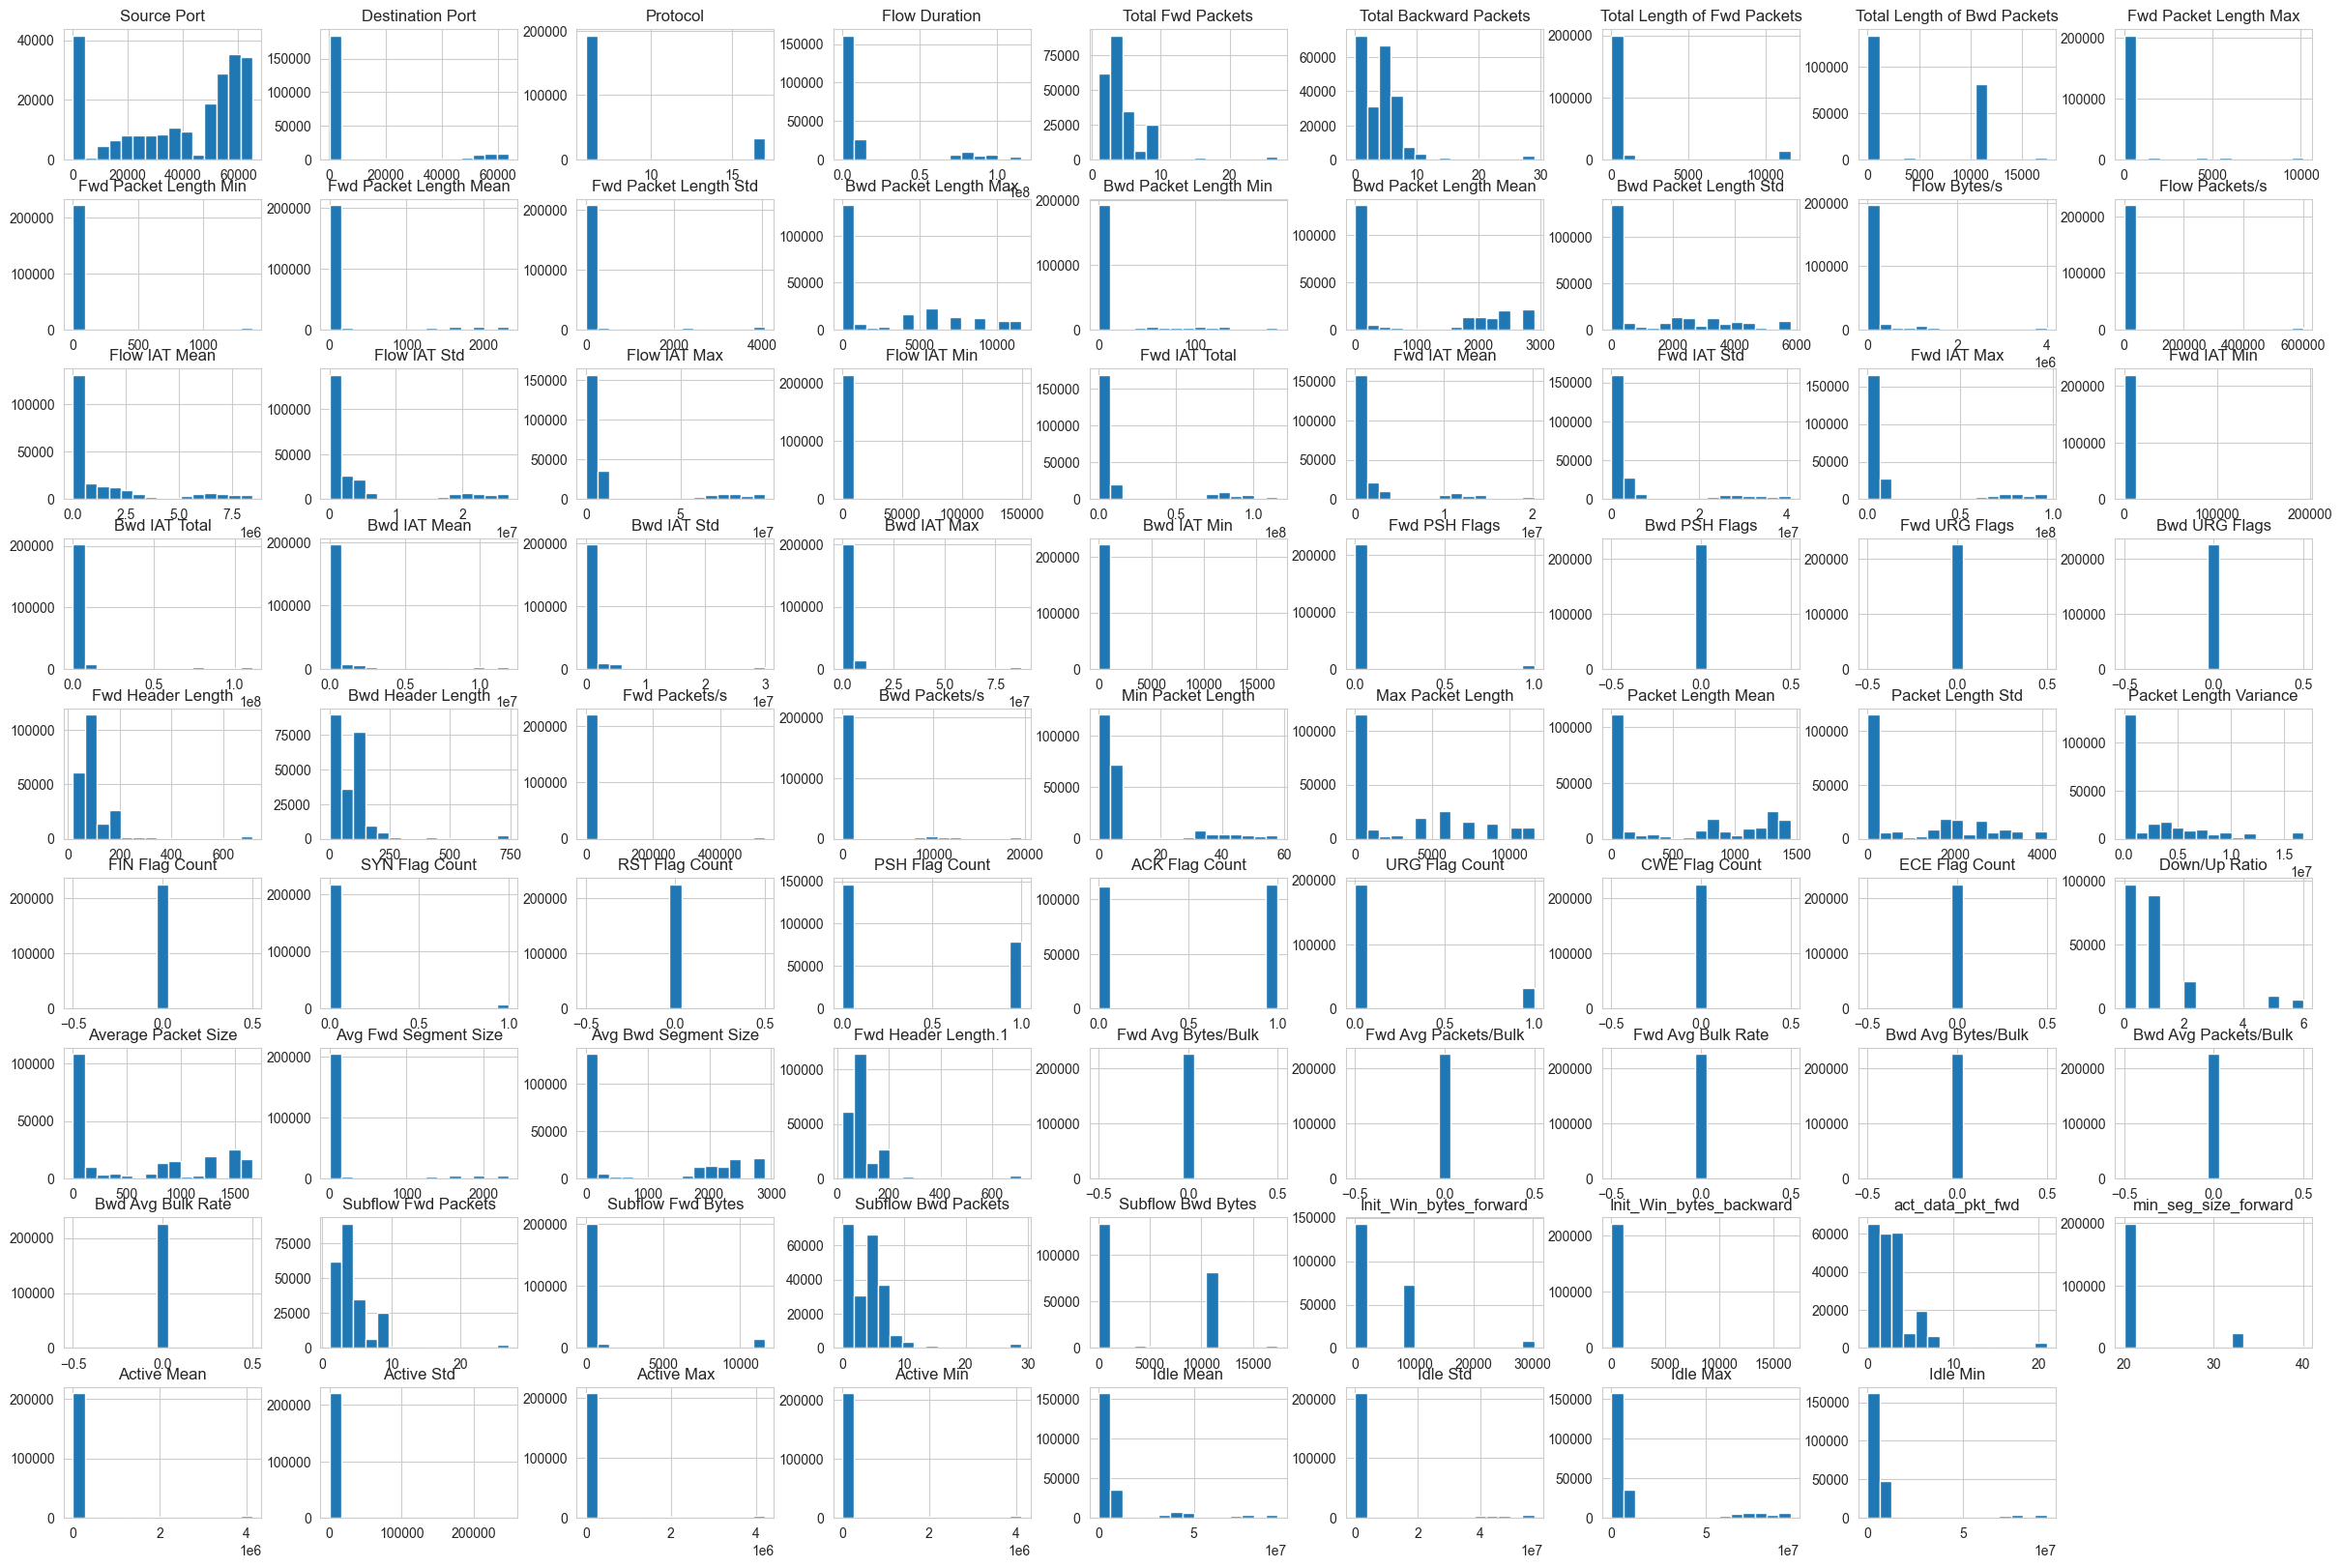

In [60]:
data[numeric_cols].hist(bins=15, figsize=(30,20))
plt.show()

## Label distribution and basic patterns

In [61]:
print(data['Label'].value_counts())

Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64


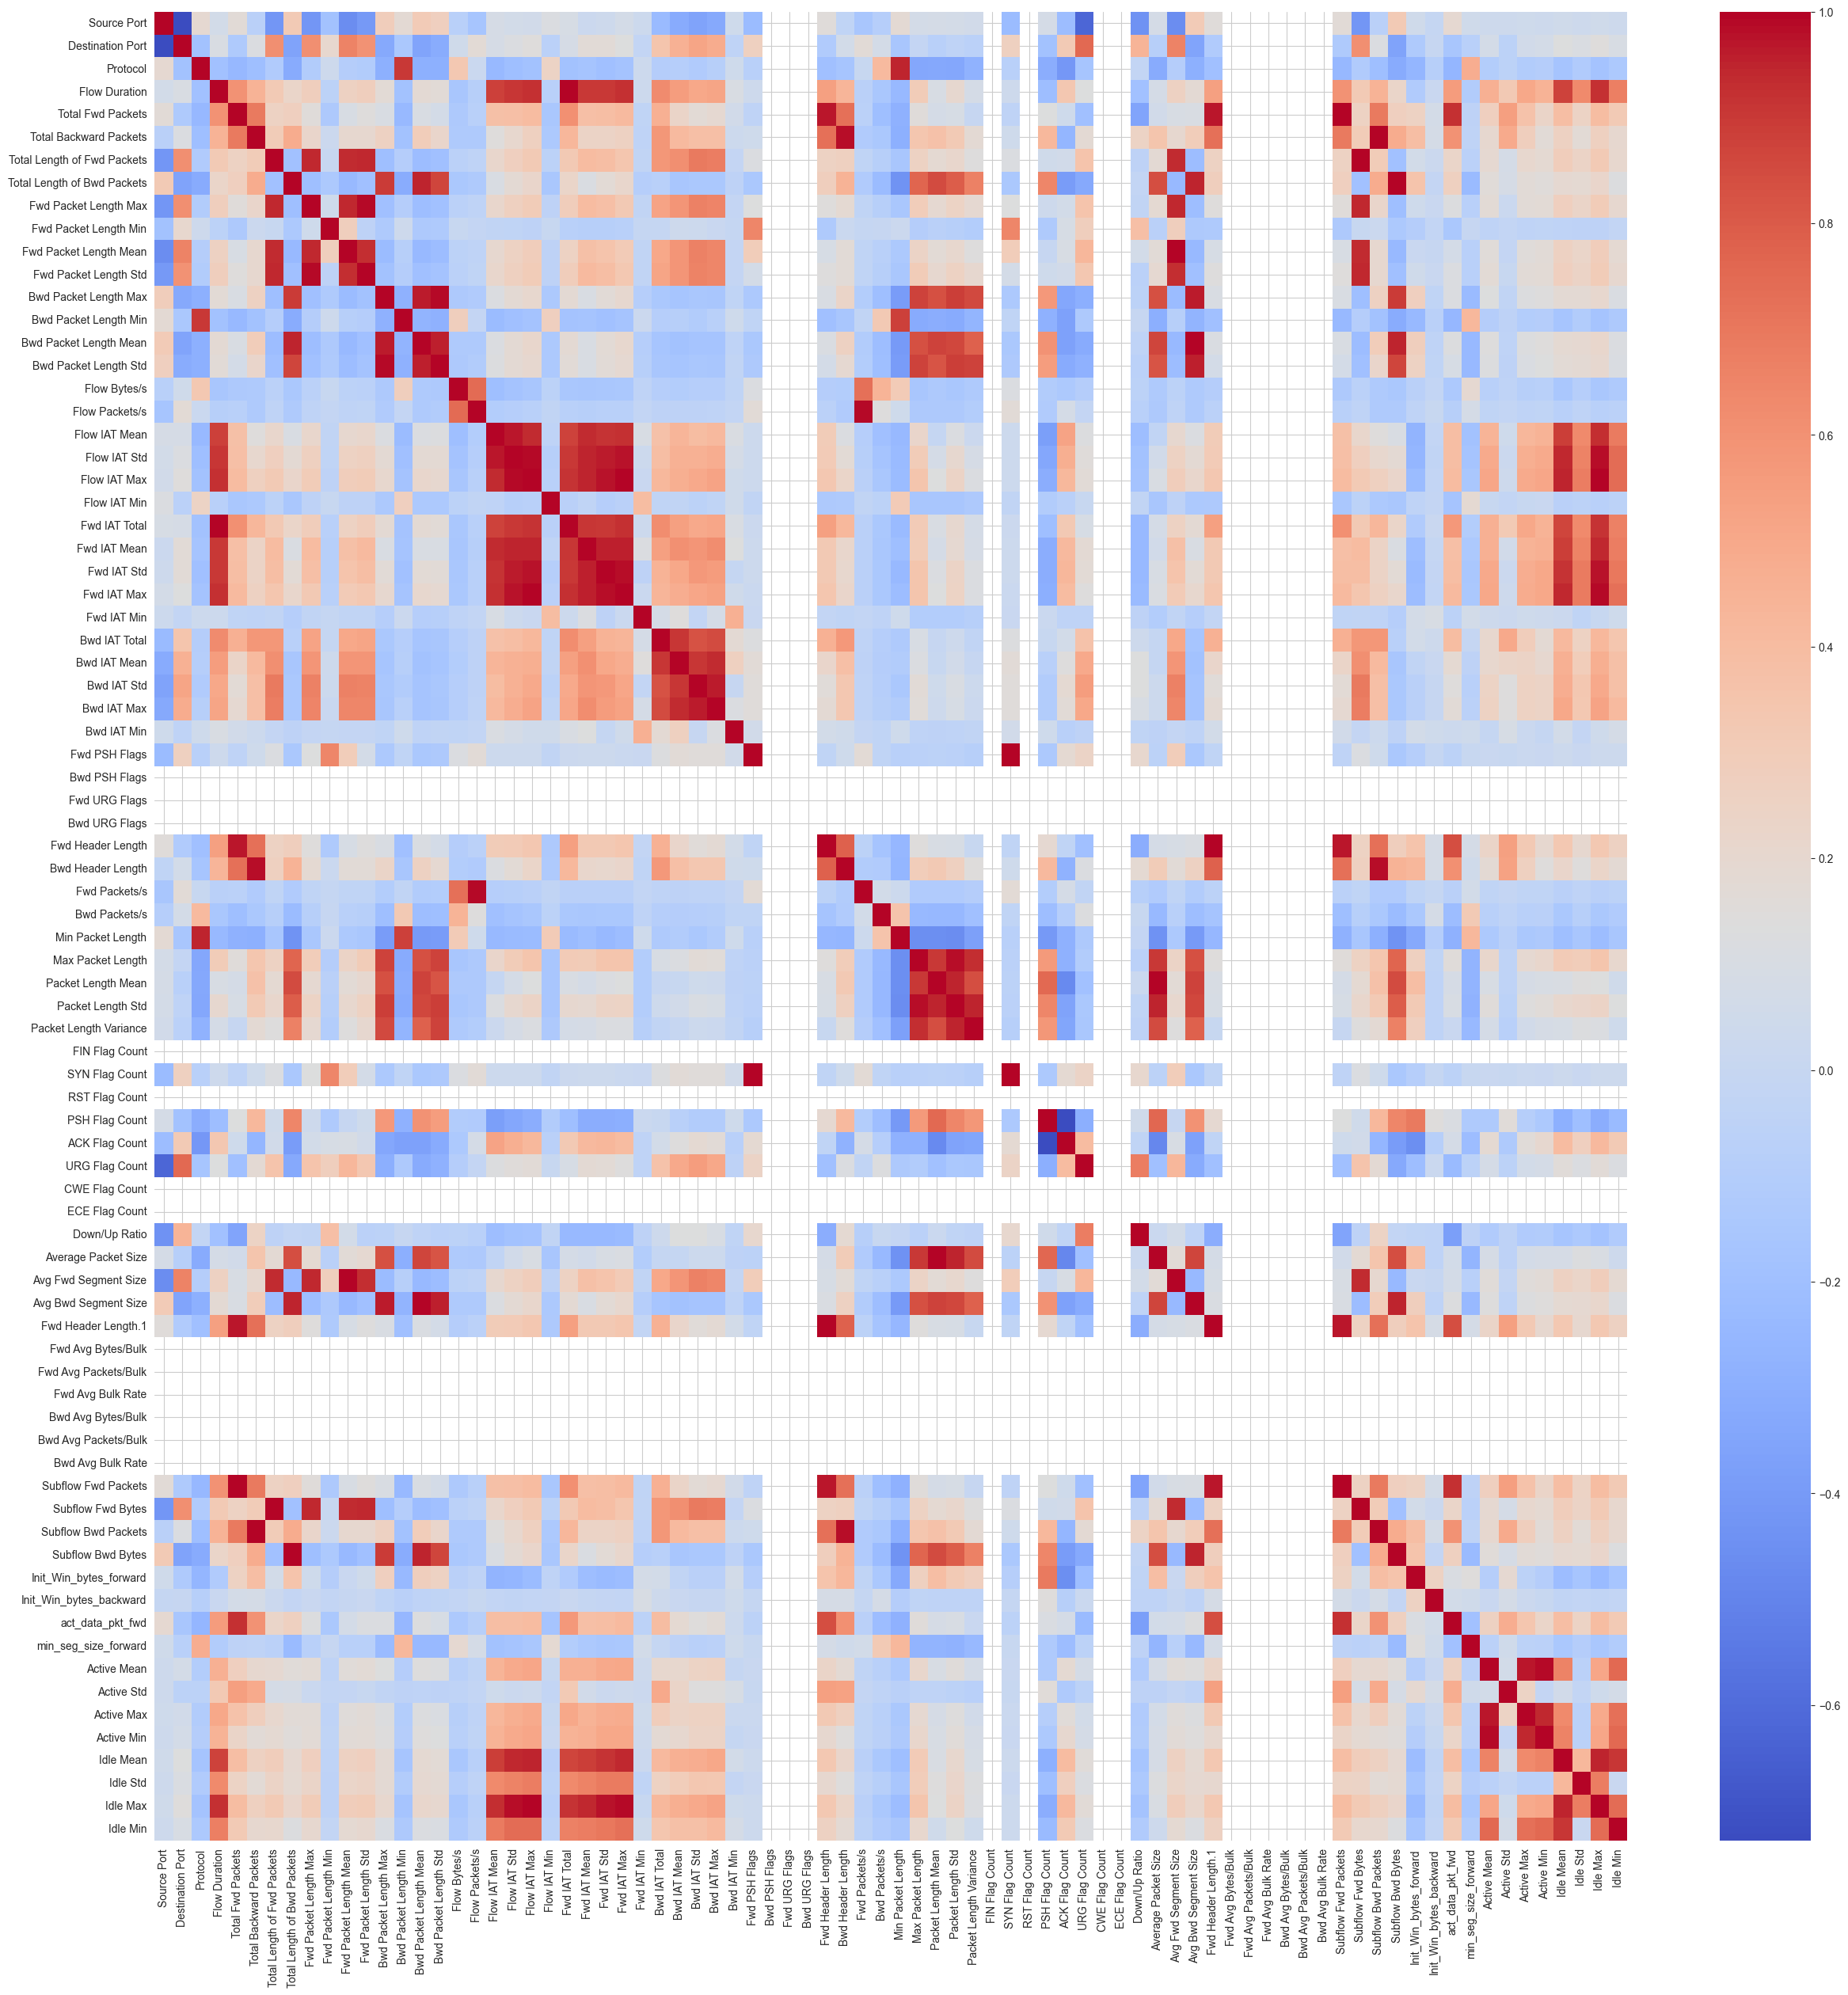

In [29]:
corr = data[numeric_cols].corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

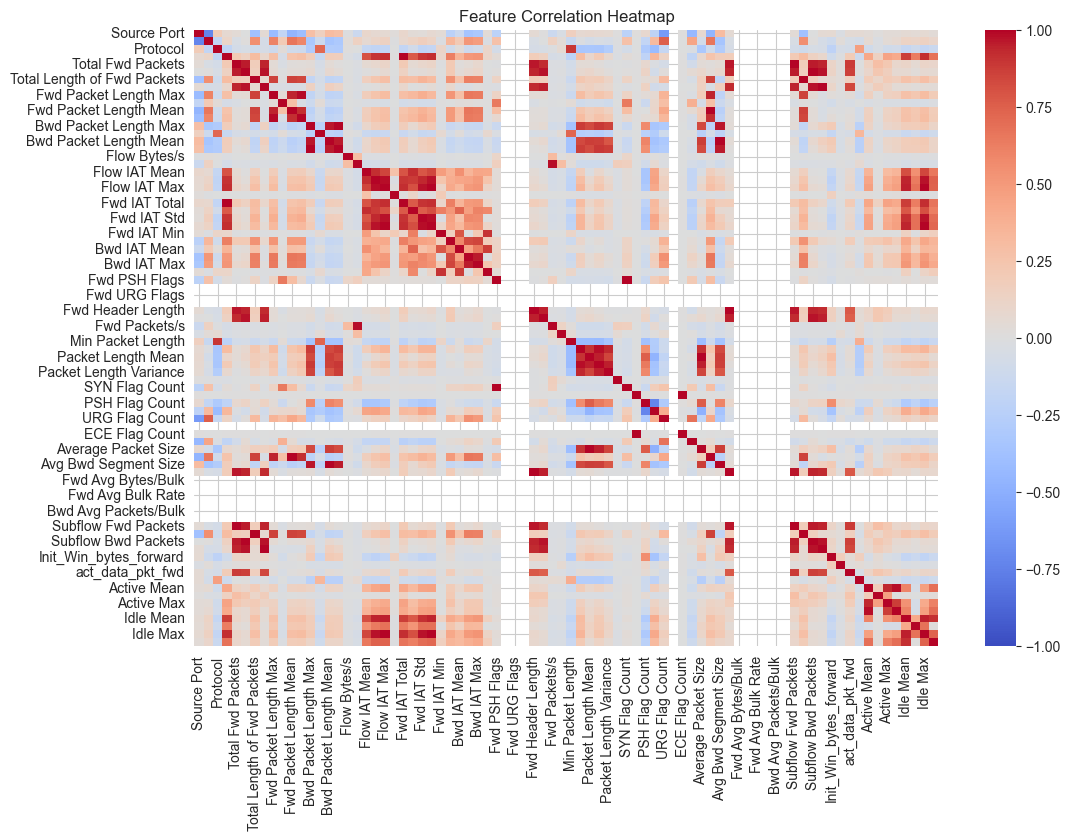

Highly correlated features: {'Fwd IAT Max', 'Fwd IAT Total', 'SYN Flag Count', 'Subflow Bwd Packets', 'Idle Max', 'Packet Length Std', 'Bwd IAT Min', 'Subflow Fwd Bytes', 'Bwd Packet Length Std', 'Idle Min', 'Packet Length Variance', 'Fwd IAT Mean', 'Bwd IAT Max', 'Flow IAT Max', 'Bwd Packet Length Mean', 'Total Length of Bwd Packets', 'Fwd Header Length', 'Active Min', 'ECE Flag Count', 'Fwd IAT Std', 'Idle Mean', 'Avg Bwd Segment Size', 'Packet Length Mean', 'Fwd Packet Length Std', 'Average Packet Size', 'Total Backward Packets', 'Fwd Header Length.1', 'Subflow Bwd Bytes', 'Flow IAT Std', 'Fwd Packets/s', 'Bwd Header Length', 'Subflow Fwd Packets', 'Active Max', 'Avg Fwd Segment Size', 'Fwd Packet Length Mean'}


In [41]:
# Correlation Matrix and Highly Correlated Features
numeric_df = data.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

# Find highly correlated features
threshold = 0.9  # Set correlation threshold
highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_features.add(corr_matrix.columns[i])
print("Highly correlated features:", highly_correlated_features)


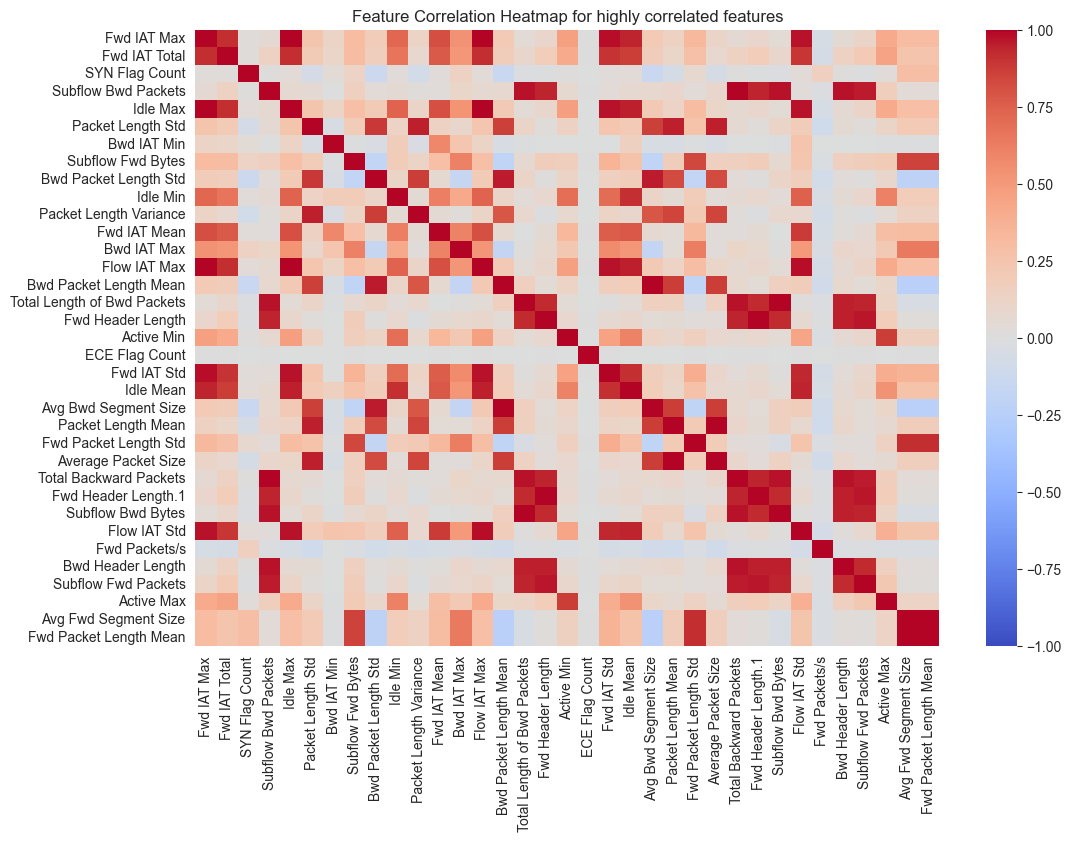

In [42]:
data_correlated = data[list(highly_correlated_features)]
corr_matrix_high_corr = data_correlated.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_high_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap for highly correlated features")
plt.show()

In [46]:
# corr_matrix_high_corr

- Active Min (Keep Active Max)
- Avg Bwd Segment Size (Keep Avg Fwd Segment Size)
- Bwd IAT Min (Keep Bwd IAT Max)
- Bwd Packet Length Std (Keep Bwd Packet Length Mean)
- ECE Flag Count (Low relevance in decision-making)
- Flow IAT Max (Keep Flow IAT Std)
- Fwd Header Length.1 (Duplicate of Fwd Header Length)
- Fwd IAT Total (Keep Fwd IAT Max)
- Idle Min (Keep Idle Max)
- Packet Length Variance (Keep Packet Length Std)
- Subflow Bwd Packets (Keep Subflow Fwd Packets)
- Total Length of Bwd Packets (Redundant with Bwd Packet Length Mean)

## Saving data

In [15]:
data.to_csv('data_processed.csv', index=False)

In [34]:
# mkdir data

In [35]:
# Perform stratified train-test split
from sklearn.model_selection import train_test_split

# Assuming `df` is the final dataset and `target_column` is the label column
target_column = "Label"  # Adjust based on your dataset

X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, stratify=y, random_state=42
)

# Optionally, save the split datasets
X_train.to_csv("data/X_train.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)